In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#EDA

In [ ]:
app_test = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/application_test.csv")
app_train = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/application_train.csv")
bureau = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/bureau.csv")
bureau_balance = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/bureau_balance.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/sample_submission.csv")
credit_card_balance = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/installments_payments.csv")
previous_application = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/previous_application.csv")
pos_cash_balance = pd.read_csv("/content/drive/MyDrive/dataset_homecredits/POS_CASH_balance.csv")

##Application_test

In [ ]:
app_test.tail()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
jumlah_kolom = app_test.shape[1]
print(jumlah_kolom)

121


In [ ]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
app_test.isnull().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049
AMT_REQ_CREDIT_BUREAU_MON,6049
AMT_REQ_CREDIT_BUREAU_QRT,6049


In [ ]:
app_test.to_pickle('app_test.pkl')

##Application Train

In [ ]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [ ]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
app_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


##bureau

In [ ]:
bureau.tail()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.00,0.0,NaN,0.0,Microloan,-387,NaN


In [ ]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [ ]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
bureau.isnull().sum()

,0
SK_ID_CURR,0
SK_ID_BUREAU,0
CREDIT_ACTIVE,0
CREDIT_CURRENCY,0
DAYS_CREDIT,0
CREDIT_DAY_OVERDUE,0
DAYS_CREDIT_ENDDATE,105553
DAYS_ENDDATE_FACT,633653
AMT_CREDIT_MAX_OVERDUE,1124488
CNT_CREDIT_PROLONG,0


In [ ]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## Bureau Balance

In [ ]:
bureau_balance.tail()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


In [ ]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [ ]:
bureau_balance.isnull().sum()

,0
SK_ID_BUREAU,0
MONTHS_BALANCE,0
STATUS,0


In [ ]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


##Sample Submission

In [ ]:
sample_submission.tail()

,SK_ID_CURR,TARGET
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5
48743,456250,0.5


In [ ]:
sample_submission.columns

Index(['SK_ID_CURR', 'TARGET'], dtype='object')

In [ ]:
sample_submission.describe()

,SK_ID_CURR,TARGET
count,48744.000000,48744.0
mean,277796.676350,0.5
std,103169.547296,0.0
min,100001.000000,0.5
25%,188557.750000,0.5
50%,277549.000000,0.5
75%,367555.500000,0.5
max,456250.000000,0.5


In [ ]:
sample_submission.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0


In [ ]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [ ]:
sample_submission.to_pickle('sample_submission.pkl')

## credit card balance

In [ ]:
credit_card_balance.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


In [ ]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [ ]:
credit_card_balance.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
AMT_BALANCE,0
AMT_CREDIT_LIMIT_ACTUAL,0
AMT_DRAWINGS_ATM_CURRENT,749816
AMT_DRAWINGS_CURRENT,0
AMT_DRAWINGS_OTHER_CURRENT,749816
AMT_DRAWINGS_POS_CURRENT,749816
AMT_INST_MIN_REGULARITY,305236


In [ ]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

## installments payment

In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
installments_payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
installments_payments.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NUM_INSTALMENT_VERSION,0
NUM_INSTALMENT_NUMBER,0
DAYS_INSTALMENT,0
DAYS_ENTRY_PAYMENT,2905
AMT_INSTALMENT,0
AMT_PAYMENT,2905


In [ ]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


## previous app

In [ ]:
previous_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [ ]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
previous_application.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [ ]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Posh cash balance

In [ ]:
pos_cash_balance.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


In [ ]:
pos_cash_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
pos_cash_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [ ]:
pos_cash_balance.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
CNT_INSTALMENT,26071
CNT_INSTALMENT_FUTURE,26087
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0


In [ ]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


#Data Cleaning

## Application Train

In [ ]:
for col in app_train.select_dtypes(include=['object','int64','float']).columns:
  print(col)
  print(app_train[col].unique())
  print()

SK_ID_CURR
[100002 100003 100004 ... 456253 456254 456255]

TARGET
[1 0]

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['M' 'F' 'XNA']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['Y' 'N']

CNT_CHILDREN
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

AMT_INCOME_TOTAL
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

AMT_CREDIT
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

AMT_GOODS_PRICE
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Single / not married'

In [ ]:
missing_percentage = app_train.isnull().mean() * 100
print(missing_percentage)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [ ]:
#melakukan drop missing values
app_train = app_train.dropna()

In [ ]:
app_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0


In [ ]:
#cek duplicate
num_duplicates = app_train.duplicated().sum()
num_duplicates

0

In [ ]:
#numerical_columns = app_train.select_dtypes(include=['int64', 'float64'])

In [ ]:
#for i in numerical_columns.columns:
    #sb.boxplot(data=numerical_columns, x=i)
    #plt.title(f'Boxplot for {i}')
    #plt.show()

In [ ]:
app_train.to_pickle('app_train.pkl')

## Bureau

In [ ]:
for column in bureau.columns:
    unique_values = bureau[column].unique()
    print(f"Kolom: {column}")
    print(unique_values)
    print("-" * 50)

Kolom: SK_ID_CURR
[215354 162297 402440 ... 448157 345866 235871]
--------------------------------------------------
Kolom: SK_ID_BUREAU
[5714462 5714463 5714464 ... 5057762 5057770 5057778]
--------------------------------------------------
Kolom: CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']
--------------------------------------------------
Kolom: CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']
--------------------------------------------------
Kolom: DAYS_CREDIT
[-497 -208 -203 ...    0   -3   -1]
--------------------------------------------------
Kolom: CREDIT_DAY_OVERDUE
[   0 2603    6   30 2156  496  186 2264   41    8   71   13  252 1201
   12   38 1777  150   18   37   64 2050    9    4   29   22   49 1930
   34  951  936  664   45 2625  837   21   15   31 1715   19   67    7
   26   23   48   46   73   90 1127   53   33 1572   39 2582   14   25
   10   50   17  193   40   20   28  123  138  700  122 1504   32  670
   75  140   24  277 2019  161  9

In [ ]:
print(f"Jumlah baris di bureau: {len(bureau)}")

Jumlah baris di bureau: 1716428


In [ ]:
#cek presentase fitur AMT_ANNUITY
missing_percentage_AMT_ANNUITY = (1226791 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_AMT_ANNUITY:.2f}%")

Persentase missing value: 71.47%


presentase menunjukan sekitar 71,47% missing value sebaiknya di drop karena terlalu banyak data yang hilang dan mungkin tidak informatif.

In [ ]:
#cek presentase fitur AMT_CREDIT_SUM_LIMIT
missing_percentage_AMT_CREDIT_SUM_LIMIT = (591780 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_AMT_CREDIT_SUM_LIMIT:.2f}%")

Persentase missing value: 34.48%


presentase menunjukan sekitar 34,48% missing value sebaiknya diisi dengan nilai 0 yang berarti bahwa pengguna tidak memiliki kartu kredit aktif atau datanya tidak dilaporkan.

In [ ]:
#cek presentase fitur AMT_CREDIT_SUM_DEBT
missing_percentage_AMT_CREDIT_SUM_DEBT = (257669 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_AMT_CREDIT_SUM_DEBT:.2f}%")

Persentase missing value: 15.01%


presentase menunjukan sekitar 34,48% missing value sebaiknya diisi dengan nilai 0 yang berarti bahwa user sudah melunasi cicilannya

In [ ]:
#cek presentase fitur AMT_CREDIT_MAX_OVERDUE
missing_percentage_AMT_CREDIT_MAX_OVERDUE = (1124488 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_AMT_CREDIT_MAX_OVERDUE:.2f}%")

Persentase missing value: 65.51%


In [ ]:
print(bureau['AMT_CREDIT_SUM_OVERDUE'].describe())

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64


count: Ada 1.716.428 data non-missing.
Ini hanya sekitar 35% dari total data (karena 65% missing value).<br>
mean: Nilai rata-rata keterlambatan adalah 37,91.<br>
Rata-rata yang rendah dibandingkan dengan nilai maksimum (3.756.681) menunjukkan bahwa sebagian besar pengguna memiliki keterlambatan kecil atau tidak ada sama sekali.<br>
std: Nilai standar deviasi yang sangat besar (5937.65) menunjukkan adanya outlier dalam data.<br>
min, 25%, 50%, 75%: Semua persentil (25%, 50%, 75%) bernilai 0.
Ini berarti sebagian besar data yang tersedia menunjukkan tidak ada keterlambatan pembayaran.<br>
max: Nilai maksimum 3.756.681 menunjukkan ada beberapa kasus dengan keterlambatan yang ekstrem.<br><br>
berdasarkan kesimpulan diatas sebaiknya nilai null diisi dengan 0 yang mengartikan bahwa nan menggambarkan user tidak terlambar atau tepat waktu dalam pembayarannya

In [ ]:
#cek presentase fitur DAYS_ENDDATE_FACT
missing_percentage_DAYS_ENDDATE_FACT = (633653 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_DAYS_ENDDATE_FACT:.2f}%")

Persentase missing value: 36.92%


presentase menunjukan sekitar 36,92% missing value sebaiknya di drop karena tidak terlalu relevan dengan target

In [ ]:
#cek presentase fitur DAYS_CREDIT_ENDDATE
missing_percentage_DAYS_CREDIT_ENDDATE = (105553 / 1716428) * 100
print(f"Persentase missing value: {missing_percentage_DAYS_CREDIT_ENDDATE:.2f}%")

Persentase missing value: 6.15%


presentase menunjukan sekitar 6,15% missing value sebaiknya diisi dengan nilai 0 yang berarti bahwa user sudah melunasi cicilannya

In [ ]:
#Handling miisng values
bureau.fillna({'AMT_CREDIT_SUM_LIMIT': 0,
               'AMT_CREDIT_SUM_DEBT': 0,
               'AMT_CREDIT_MAX_OVERDUE': 0,
               'DAYS_CREDIT_ENDDATE': 0}, inplace=True)

In [ ]:
bureau = bureau.dropna(subset=['AMT_ANNUITY', 'DAYS_ENDDATE_FACT'])

In [ ]:
bureau.isnull().sum()

,0
SK_ID_CURR,0
SK_ID_BUREAU,0
CREDIT_ACTIVE,0
CREDIT_CURRENCY,0
DAYS_CREDIT,0
CREDIT_DAY_OVERDUE,0
DAYS_CREDIT_ENDDATE,0
DAYS_ENDDATE_FACT,0
AMT_CREDIT_MAX_OVERDUE,0
CNT_CREDIT_PROLONG,0


In [ ]:
#cek duplicate
bureau.duplicated().sum()

0

In [ ]:
#numerical_columns_bureau = bureau.select_dtypes(include=['int64', 'float64'])

In [ ]:
#for i in numerical_columns_bureau.columns:
    #sb.boxplot(data=numerical_columns_bureau, x=i)
    #plt.title(f'Boxplot for {i}')
    #plt.show()

In [ ]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,288967.000000,2.889670e+05,288967.000000,288967.000000,288967.000000,288967.000000,2.889670e+05,288967.000000,2.889670e+05,2.889670e+05,2.889670e+05,288967.000000,288967.000000,2.889670e+05
mean,277950.256209,6.018434e+06,-1404.209380,0.201559,-446.849464,-994.466316,1.009697e+03,0.002294,2.677838e+05,3.823587e+03,2.682066e+02,0.161941,-825.445141,1.417845e+04
std,102737.524504,5.029638e+05,751.100206,20.103754,3307.369832,684.364604,2.165860e+05,0.055916,7.019094e+05,1.286604e+05,9.260645e+03,36.307934,629.672832,3.970399e+05
min,100001.000000,5.001710e+06,-2922.000000,0.000000,-42060.000000,-3042.000000,0.000000e+00,0.000000,0.000000e+00,-8.527950e+03,-1.886756e+04,0.000000,-41947.000000,0.000000e+00
25%,188970.000000,5.683896e+06,-1946.000000,0.000000,-1414.000000,-1424.000000,0.000000e+00,0.000000,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,-1144.000000,0.000000e+00
50%,277518.000000,6.060341e+06,-1339.000000,0.000000,-778.000000,-920.000000,0.000000e+00,0.000000,1.011600e+05,0.000000e+00,0.000000e+00,0.000000,-763.000000,0.000000e+00
75%,367201.000000,6.425046e+06,-803.000000,0.000000,-197.000000,-421.000000,0.000000e+00,0.000000,2.342790e+05,0.000000e+00,0.000000e+00,0.000000,-330.000000,6.718500e+03
max,456255.000000,6.842884e+06,-3.000000,2792.000000,31131.000000,0.000000,1.159872e+08,5.000000,1.009980e+08,5.175000e+07,1.783537e+06,13023.000000,0.000000,1.184534e+08


In [ ]:
bureau.to_pickle('bureau.pkl')

## Bureau Balance

In [ ]:
for column in bureau_balance.columns:
    unique_values = bureau_balance[column].unique()
    print(f"Kolom: {column}")
    print(unique_values)
    print("-" * 50)

Kolom: SK_ID_BUREAU
[5715448 5715449 5715451 ... 5041172 5041332 5041336]
--------------------------------------------------
Kolom: MONTHS_BALANCE
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96]
--------------------------------------------------
Kolom: STATUS
['C' '0' 'X' '1' '2' '3' '5' '4']
--------------------------------------------------


In [ ]:
#cek duplicate
bureau_balance.duplicated().sum()

0

In [ ]:
#numerical_columns_bureau_balance = bureau_balance.select_dtypes(include=['int64'])

In [ ]:
#for i in numerical_columns_bureau_balance.columns:
    #sb.boxplot(data=numerical_columns_bureau_balance, x=i)
    #plt.title(f'Boxplot for {i}')
    #plt.show()

In [ ]:
bureau_balance.to_pickle('bureau_balance.pkl')

##Credit card balance

In [ ]:
for column in credit_card_balance.columns:
    unique_values = credit_card_balance[column].unique()
    print(f"Kolom: {column}")
    print(unique_values)
    print("-" * 50)

Kolom: SK_ID_PREV
[2562384 2582071 1740877 ... 1897864 2481982 2191610]
--------------------------------------------------
Kolom: SK_ID_CURR
[378907 363914 371185 ... 174455 315041 382749]
--------------------------------------------------
Kolom: MONTHS_BALANCE
[ -6  -1  -7  -4  -5  -3  -2 -19 -13 -18 -15 -12 -22 -16 -21 -14 -20 -17
 -11 -52 -54 -58 -53 -51 -50 -59 -56 -57 -60 -55 -26 -25 -24 -23 -67 -64
 -62 -63 -61 -65 -66 -10  -9 -88 -95 -86 -89 -91 -93 -87 -90 -92 -94 -85
 -72 -73 -70 -69 -68 -71 -74  -8 -27 -80 -79 -84 -83 -81 -82 -96 -28 -36
 -31 -32 -40 -41 -35 -34 -39 -33 -37 -38 -47 -48 -45 -44 -43 -49 -42 -46
 -76 -78 -77 -75 -30 -29]
--------------------------------------------------
Kolom: AMT_BALANCE
[5.69700000e+01 6.39755550e+04 3.18152250e+04 ... 2.60671500e+05
 2.77204095e+05 2.75784975e+05]
--------------------------------------------------
Kolom: AMT_CREDIT_LIMIT_ACTUAL
[ 135000   45000  450000  225000  270000  585000  292500  180000   67500
       0  157500  360000 

In [ ]:
print(f"Jumlah baris di credit card balance: {len(credit_card_balance)}")

Jumlah baris di credit card balance: 3840312


In [ ]:
#cek presentase fitur CNT_INSTALMENT_MATURE_CUM
missing_percentage_CNT_INSTALMENT_MATURE_CUM = (305236 / 3840312) * 100
print(f"Persentase missing value: {missing_percentage_CNT_INSTALMENT_MATURE_CUM:.2f}%")

Persentase missing value: 7.95%


fitur ini sepertinya akan digunakan untuk analisis maka missing values akan diisi dengan nilai median dikarenakan Tidak terpengaruh outlier, Mempertahankan distribusi data, Tidak mengasumsikan distribusi data tertentu.

CNT_DRAWINGS_POS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_POS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_ATM_CURRENT, AMT_INST_MIN_REGULARITY (akan dilakukan drop)

In [ ]:
#handling missing values
credit_card_balance = credit_card_balance.dropna(subset=['CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT',
                                                         'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT',
                                                         'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT'])

In [ ]:
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'] = credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].astype(int)

<ipython-input-83-495ae3d63cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_balance['CNT_INSTALMENT_MATURE_CUM'] = credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].astype(int)


In [ ]:
#diisi dengan nilai median
median_value = credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].median()
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(median_value, inplace=True)

<ipython-input-84-06adf23c6f95>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(median_value, inplace=True)
<ipython-input-84-06adf23c6f95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(median_value, inplace=True)


In [ ]:
credit_card_balance.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
MONTHS_BALANCE,0
AMT_BALANCE,0
AMT_CREDIT_LIMIT_ACTUAL,0
AMT_DRAWINGS_ATM_CURRENT,0
AMT_DRAWINGS_CURRENT,0
AMT_DRAWINGS_OTHER_CURRENT,0
AMT_DRAWINGS_POS_CURRENT,0
AMT_INST_MIN_REGULARITY,0


In [ ]:
#cek dupliacte
credit_card_balance.duplicated().sum()

0

In [ ]:
#numerical_columns_credit_cardbalance = credit_card_balance.select_dtypes(include=['int64', 'float64'])

In [ ]:
#for i in numerical_columns_credit_cardbalance.columns:
    #sb.boxplot(data=numerical_columns_credit_cardbalance, x=i)
    #plt.title(f'Boxplot for {i}')
    #plt.show()

In [ ]:
credit_card_balance.to_pickle('credit_card_balance.pkl')

##Installment payment

In [ ]:
print(f"Jumlah baris di credit card balance: {len(installments_payments)}")

Jumlah baris di credit card balance: 13605401


In [ ]:
#cek presentase fiturDAYS_ENTRY_PAYMENT
missing_percentage_DAYS_ENTRY_PAYMENT = (2905 / 13605401) * 100
print(f"Persentase missing value: {missing_percentage_DAYS_ENTRY_PAYMENT:.2f}%")

Persentase missing value: 0.02%


In [ ]:
#handling missing values
installments_payments = installments_payments.dropna(subset=['DAYS_ENTRY_PAYMENT'])

In [ ]:
installments_payments.duplicated().sum()

0

In [ ]:
installments_payments.to_pickle('installments_payments.pkl')

## posh case balance

In [ ]:
print(f"Jumlah baris di credit card balance: {len(pos_cash_balance)}")

Jumlah baris di credit card balance: 10001358


In [ ]:
#cek presentase fitur CNT_INSTALMENT_FUTURE
missing_percentage_CNT_INSTALMENT_FUTURE = (26087/10001358) * 100
print(f"Persentase missing value: {missing_percentage_CNT_INSTALMENT_FUTURE:.2f}%")

Persentase missing value: 0.26%


In [ ]:
#handling missing values
pos_cash_balance = pos_cash_balance.dropna()

In [ ]:
pos_cash_balance.to_pickle('pos_cash_balance.pkl')

## previous app

In [ ]:
for column in previous_application.columns:
    unique_values = previous_application[column].unique()
    print(f"Kolom: {column}")
    print(unique_values)
    print("-" * 50)

Kolom: SK_ID_PREV
[2030495 2802425 2523466 ... 2659632 2785582 2418762]
--------------------------------------------------
Kolom: SK_ID_CURR
[271877 108129 122040 ... 253940 353284 191629]
--------------------------------------------------
Kolom: NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
--------------------------------------------------
Kolom: AMT_ANNUITY
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
--------------------------------------------------
Kolom: AMT_APPLICATION
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
--------------------------------------------------
Kolom: AMT_CREDIT
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
--------------------------------------------------
Kolom: AMT_DOWN_PAYMENT
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
--------------------------------------------------
Kolom: AMT_GOODS_PRICE
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267

In [ ]:
#handling missing values
previous_application = previous_application.dropna()

In [ ]:
previous_application.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,0
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_DOWN_PAYMENT,0
AMT_GOODS_PRICE,0
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [ ]:
previous_application.duplicated().sum()

0

In [ ]:
#numerical_columns_previous_app = previous_application.select_dtypes(include=['int64', 'float64'])

In [ ]:
#for i in numerical_columns_previous_app.columns:
    #sb.boxplot(data=numerical_columns_previous_app, x=i)
    #plt.title(f'Boxplot for {i}')
    #plt.show()

In [ ]:
previous_application.to_pickle('previous_application.pkl')

# Join Tabel 1

In [ ]:
# Load datasets
#application_data = pd.read_csv("application_train.csv")
#installments_data = pd.read_csv("installments_payments.csv")
#previous_applications = pd.read_csv("previous_application.csv")

# Select relevant columns from application data
application_subset = app_train[[
    'SK_ID_CURR', 'TARGET', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED',
    'REGION_RATING_CLIENT'
]]

# Merge with installments payments for payment details
installments_subset = installments_payments[['SK_ID_CURR', 'AMT_PAYMENT', 'AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT']]
merged_data = application_subset.merge(installments_subset, on='SK_ID_CURR', how='left')

In [ ]:
# Add information from previous applications
#previous_subset = previous_application[['SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'AMT_CREDIT', 'DAYS_DECISION']]
#final_data = merged_data.merge(previous_subset, on='SK_ID_CURR', how='left')

# Filter based on employment types
employment_filter = merged_data['NAME_INCOME_TYPE'].isin(['Working', 'Commercial associate', 'Pensioner', 'State servant'])
filtered_data = merged_data[employment_filter]

# Save subset to a new CSV file
filtered_data.to_csv("subset_for_analysis.csv", index=False)

print("Subset data created and saved as 'subset_for_analysis.csv'")

Subset data created and saved as 'subset_for_analysis.csv'


In [ ]:
application_data = pd.read_csv("subset_for_analysis.csv")

In [ ]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,REGION_RATING_CLIENT,AMT_PAYMENT,AMT_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100083,0,Working,Laborers,103500.0,573628.5,24435.0,0,2.0,-892,2,11915.1,11915.1,-798.0
1,100083,0,Working,Laborers,103500.0,573628.5,24435.0,0,2.0,-892,2,11915.1,11915.1,-507.0
2,100083,0,Working,Laborers,103500.0,573628.5,24435.0,0,2.0,-892,2,11915.1,11915.1,-140.0
3,100083,0,Working,Laborers,103500.0,573628.5,24435.0,0,2.0,-892,2,11915.1,11915.1,-473.0
4,100083,0,Working,Laborers,103500.0,573628.5,24435.0,0,2.0,-892,2,11915.1,11915.1,-353.0


In [ ]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT',
       'AMT_PAYMENT', 'AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT'],
      dtype='object')

# EDA

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327536 entries, 0 to 327535
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            327536 non-null  int64  
 1   TARGET                327536 non-null  int64  
 2   NAME_INCOME_TYPE      327536 non-null  object 
 3   OCCUPATION_TYPE       327536 non-null  object 
 4   AMT_INCOME_TOTAL      327536 non-null  float64
 5   AMT_CREDIT            327536 non-null  float64
 6   AMT_ANNUITY           327536 non-null  float64
 7   CNT_CHILDREN          327536 non-null  int64  
 8   CNT_FAM_MEMBERS       327536 non-null  float64
 9   DAYS_EMPLOYED         327536 non-null  int64  
 10  REGION_RATING_CLIENT  327536 non-null  int64  
 11  AMT_PAYMENT           327027 non-null  float64
 12  AMT_INSTALMENT        327027 non-null  float64
 13  DAYS_ENTRY_PAYMENT    327027 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 35.

In [ ]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in application_data.columns]

application_data.columns = new_cols

In [ ]:
application_data.duplicated().sum()

6627

In [ ]:
application_data.drop_duplicates(inplace=True)

In [ ]:
application_data.duplicated().sum()

0

In [ ]:
application_data.isnull().sum()

,0
sk_id_curr,0
target,0
name_income_type,0
occupation_type,0
amt_income_total,0
amt_credit,0
amt_annuity,0
cnt_children,0
cnt_fam_members,0
days_employed,0


In [ ]:
application_data.dropna(subset=['days_entry_payment', 'amt_instalment', 'amt_payment'], inplace=True)

In [ ]:
application_data.isnull().sum()

,0
sk_id_curr,0
target,0
name_income_type,0
occupation_type,0
amt_income_total,0
amt_credit,0
amt_annuity,0
cnt_children,0
cnt_fam_members,0
days_employed,0


In [ ]:
category = ['name_income_type', 'occupation_type']
numerical = ['target', 'amt_income_total', 'amt_credit', 'amt_annuity', 'cnt_children', 'cnt_fam_members', 'days_employed',
             'region_rating_client', 'amt_payment', 'amt_instalment', 'days_entry_payment']

## Feature Transformation

In [ ]:
# Pastikan kolom AMT_PAYMENT dan AMT_INSTALMENT ada di DataFrame
# Hindari pembagian dengan nol
application_data['payment_installment_ratio'] = application_data.apply(
    lambda row: row['amt_payment'] / row['amt_instalment'] if row['amt_instalment'] != 0 else None, axis=1
)

# Tampilkan hasil
print(application_data[['amt_payment', 'amt_instalment', 'payment_installment_ratio']].head())

   amt_payment  amt_instalment  payment_installment_ratio
0      11915.1         11915.1                        1.0
1      11915.1         11915.1                        1.0
2      11915.1         11915.1                        1.0
3      11915.1         11915.1                        1.0
4      11915.1         11915.1                        1.0


Interpretasi Fitur:
Rasio > 1: Pembayaran melampaui jumlah angsuran yang dijadwalkan.
Rasio = 1: Pembayaran sesuai dengan jumlah angsuran yang dijadwalkan.
Rasio < 1: Pembayaran kurang dari jumlah angsuran yang dijadwalkan.

In [ ]:
application_data['payment_status_binary'] = application_data['days_entry_payment'].apply(
    lambda x: 1 if x >= 0 else 0
)

# Tampilkan hasil
print(application_data[['days_entry_payment', 'payment_status_binary']].head())


   days_entry_payment  payment_status_binary
0              -798.0                      0
1              -507.0                      0
2              -140.0                      0
3              -473.0                      0
4              -353.0                      0


Logika:
Jika nilai DAYS_ENTRY_PAYMENT lebih besar atau sama dengan 0, pembayaran dilakukan tepat waktu (atau lebih awal).
Jika nilai DAYS_ENTRY_PAYMENT kurang dari 0, pembayaran dilakukan terlambat.

# insight

Tujuan:
Mengidentifikasi hubungan antara kategori pekerjaan (occupation_type) dengan perilaku pembayaran (payment_status_binary).

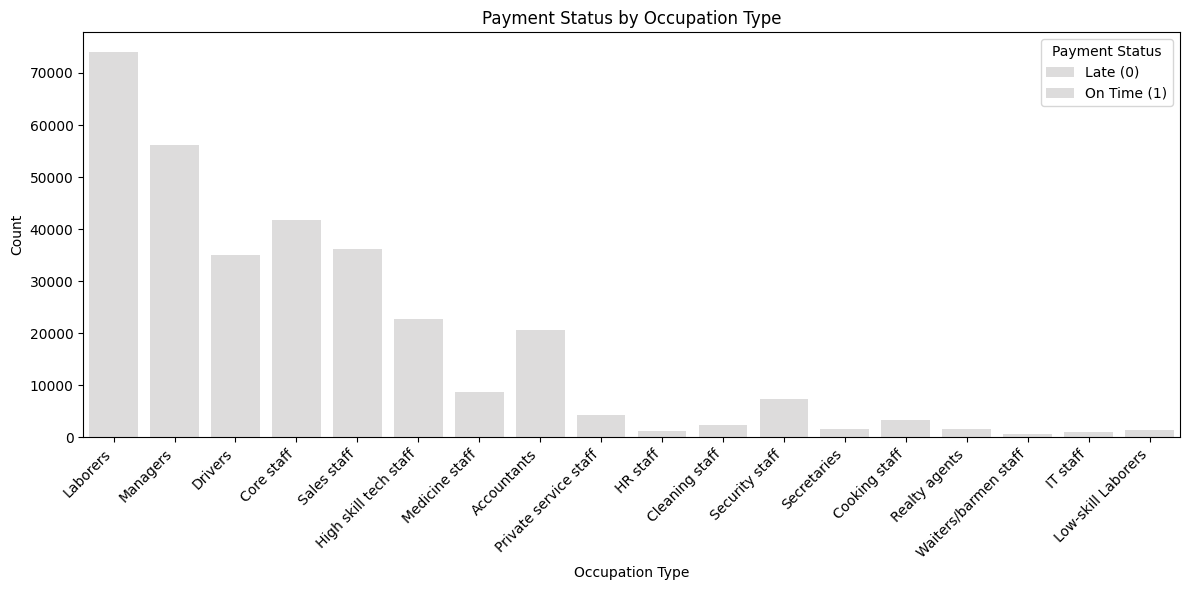

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis distribusi perilaku pembayaran berdasarkan pekerjaan
plt.figure(figsize=(12, 6))
sns.countplot(data=application_data, x='occupation_type', hue='payment_status_binary', palette='coolwarm')
plt.title("Payment Status by Occupation Type")
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Payment Status", labels=["Late (0)", "On Time (1)"])
plt.tight_layout()
plt.show()


Gambar 1: Distribusi Pembayaran Berdasarkan Kategori Pekerjaan
Grafik ini menunjukkan pola distribusi pembayaran antara kategori pekerjaan berdasarkan status pembayaran (tepat waktu atau terlambat).

Kategori pekerjaan tertentu, seperti [kategori pekerjaan dominan dalam keterlambatan], cenderung memiliki proporsi keterlambatan pembayaran yang lebih tinggi.
Insight: Kategori ini dapat diprioritaskan untuk evaluasi risiko kredit lebih ketat karena menunjukkan perilaku pembayaran yang kurang stabil.

Tujuan:
Segmentasi pekerjaan berdasarkan kombinasi variabel risiko, seperti amt_income_total, days_employed, dan payment_status_binary, untuk mengidentifikasi kelompok berisiko tinggi.

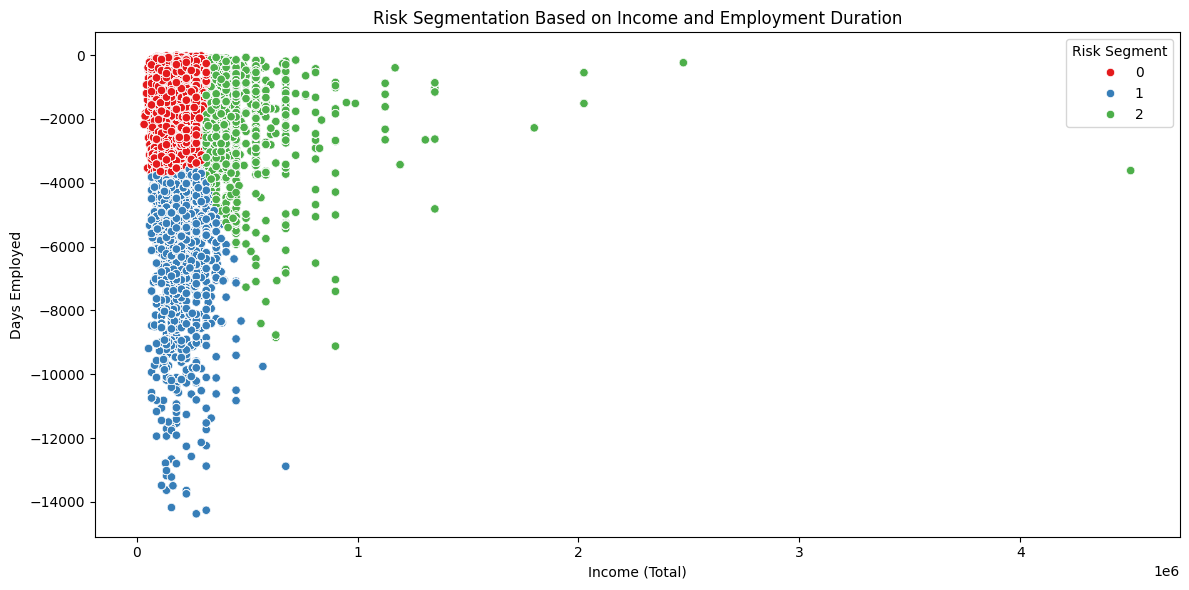

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur untuk segmentasi
features = ['amt_income_total', 'days_employed', 'payment_installment_ratio']
scaled_data = StandardScaler().fit_transform(application_data[features])

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
application_data['risk_segment'] = kmeans.fit_predict(scaled_data)

# Visualisasi segmentasi
plt.figure(figsize=(12, 6))
sns.scatterplot(data=application_data, x='amt_income_total', y='days_employed', hue='risk_segment', palette='Set1')
plt.title("Risk Segmentation Based on Income and Employment Duration")
plt.xlabel("Income (Total)")
plt.ylabel("Days Employed")
plt.legend(title="Risk Segment")
plt.tight_layout()
plt.show()


Gambar 2: Hubungan Pendapatan dengan Status Pembayaran
Grafik ini menggambarkan distribusi pendapatan (amt_income_total) di setiap kategori pekerjaan, dikelompokkan berdasarkan status pembayaran.

Pendapatan yang lebih rendah tampaknya berkorelasi dengan proporsi keterlambatan yang lebih tinggi pada beberapa kategori pekerjaan.
Insight: Pendapatan dapat menjadi faktor penting dalam menilai kelayakan kredit, terutama untuk pekerjaan dengan risiko keterlambatan tinggi.

Tujuan:
Menganalisis bagaimana jumlah anggota keluarga (cnt_fam_members) memengaruhi pola pembayaran di kategori pekerjaan yang berbeda.

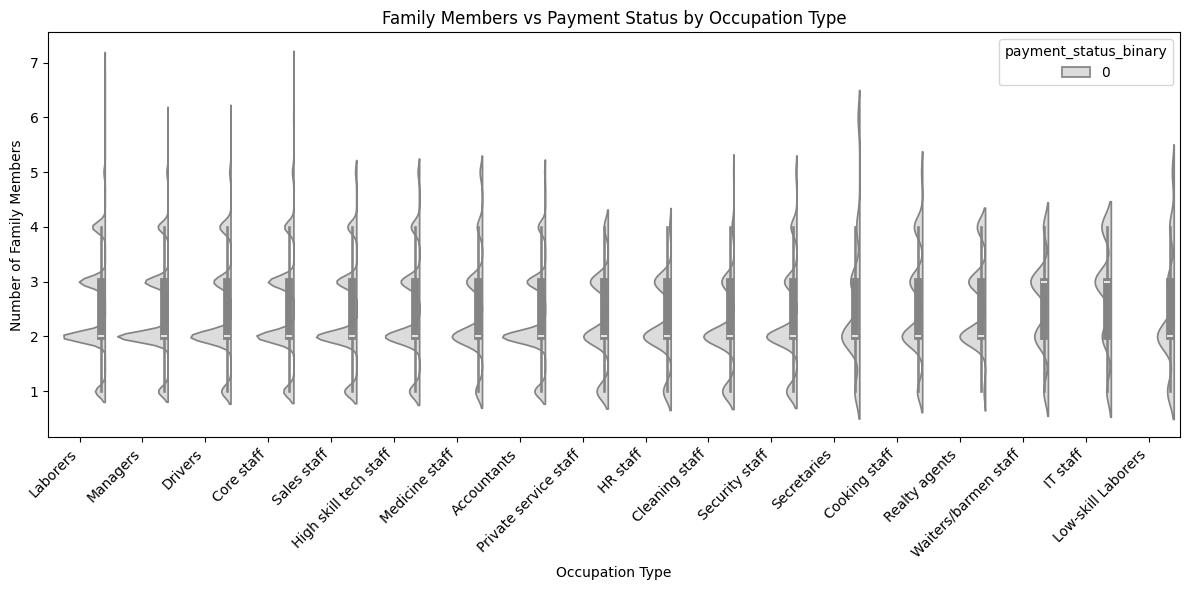

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=application_data, x='occupation_type', y='cnt_fam_members', hue='payment_status_binary', split=True, palette='coolwarm')
plt.title("Family Members vs Payment Status by Occupation Type")
plt.ylabel("Number of Family Members")
plt.xlabel("Occupation Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Gambar 3: Rasio Pembayaran terhadap Angsuran Berdasarkan Kategori Pekerjaan
Grafik ini mengilustrasikan rasio payment_installment_ratio (AMT_PAYMENT / AMT_INSTALMENT) untuk setiap kategori pekerjaan.

Rasio yang rendah (<1) lebih umum pada kategori tertentu yang menunjukkan risiko keterlambatan lebih tinggi.
Insight: Rasio ini dapat digunakan sebagai indikator stabilitas pembayaran, membantu memprioritaskan pekerjaan dengan rasio rendah untuk strategi mitigasi risiko.


Tujuan:
Melihat hubungan antarvariabel untuk pola pembayaran.

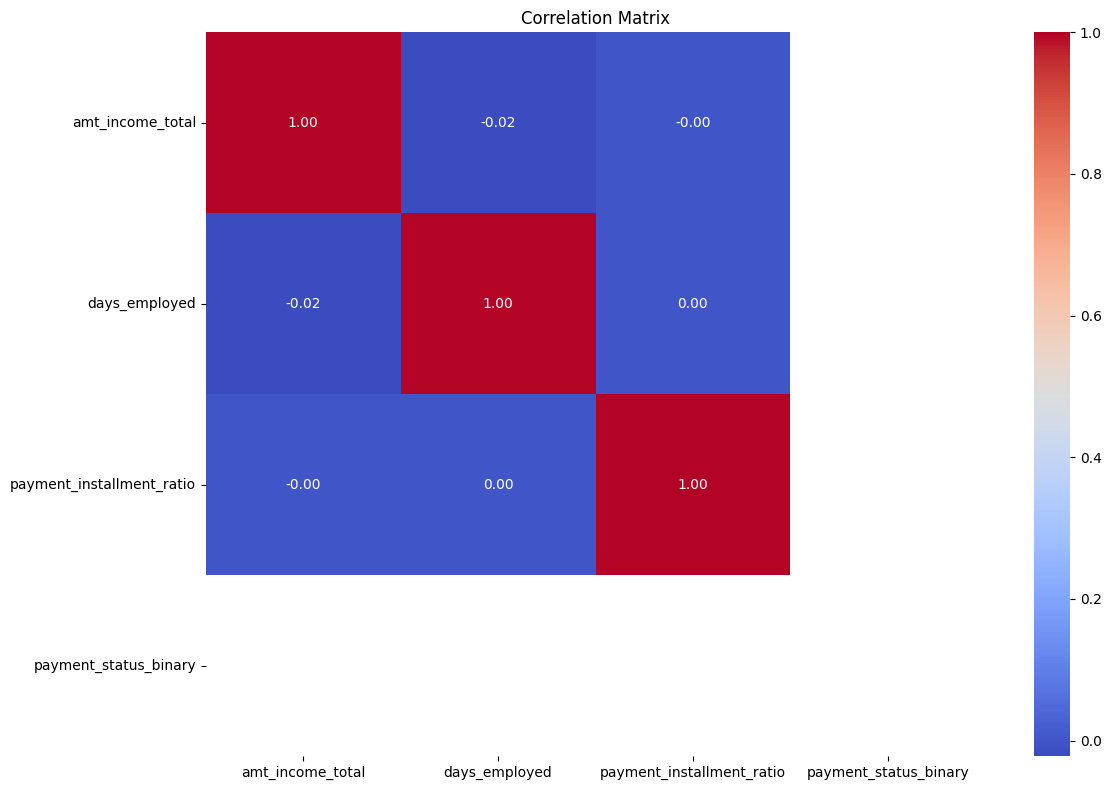

In [ ]:
# Korelasi antarvariabel numerikal
corr_matrix = application_data[features + ['payment_status_binary']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Gambar 4: Segmentasi Risiko Berdasarkan Faktor Sosial dan Ekonomi
Grafik ini mengelompokkan kategori pekerjaan berdasarkan variabel seperti pendapatan, lama bekerja (days_employed), dan rasio pembayaran.

Beberapa segmen pekerjaan tampak lebih berisiko dengan kombinasi pendapatan rendah dan rasio pembayaran yang buruk.
Insight: Strategi kredit dapat difokuskan pada segmen berisiko untuk meningkatkan deteksi dini gagal bayar.


# Machine Learning

In [ ]:
application_data.columns

Index(['sk_id_curr', 'target', 'name_income_type', 'occupation_type',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'cnt_children',
       'cnt_fam_members', 'days_employed', 'region_rating_client',
       'amt_payment', 'amt_instalment', 'days_entry_payment',
       'payment_installment_ratio', 'payment_status_binary', 'risk_segment'],
      dtype='object')

In [ ]:
X = application_data[['amt_income_total', 'amt_credit', 'amt_annuity', 'amt_payment',
                      'amt_instalment', 'cnt_children', 'cnt_fam_members',
                      'days_employed', 'region_rating_client', 'days_entry_payment',
                      'risk_segment', 'payment_status_binary',]]
# y = application_data[['payment_installment_ratio']]

#threshold sebagai median nilai payment_installment_ratio
threshold = application_data['payment_installment_ratio'].median()
# Konversi nilai y ke kelas biner
y = (application_data['payment_installment_ratio'] > threshold).astype(int)

In [ ]:
# Periksa distribusi kelas pada data asli
# print("Distribusi kelas pada data asli:")
# print(y.value_counts())

print("Distribusi kelas setelah konversi:")
print(y.value_counts())


Distribusi kelas setelah konversi:
payment_installment_ratio
0    315919
1      4481
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Split data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Periksa distribusi kelas pada data training
print("Distribusi kelas pada data training sebelum SMOTE:")
print(y_train.value_counts())

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Periksa distribusi kelas setelah SMOTE
print("Distribusi kelas pada data training setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Distribusi kelas pada data training sebelum SMOTE:
payment_installment_ratio
0    252735
1      3585
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Distribusi kelas pada data training setelah SMOTE:
payment_installment_ratio
0    252735
1    252735
Name: count, dtype: int64


##Logistic Regression

In [ ]:
# Latih model Logistic Regression
model = LogisticRegression(max_iter=8000, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba))

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
ROC AUC (Test Set): 1.00


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Latih model Decision Tree
model2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model2.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred = model2.predict(X_test)
y_pred_proba = model2.predict_proba(X_test)[:, 1]

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba))


Accuracy (Test Set): 1.00
Precision (Test Set): 0.83
Recall (Test Set): 0.93
F1-Score (Test Set): 0.87
ROC AUC (Test Set): 0.96


##XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Latih model XGBoost
model3 = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]),
                        random_state=42, use_label_encoder=False, eval_metric='logloss')
model3.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred = model3.predict(X_test)
y_pred_proba = model3.predict_proba(X_test)[:, 1]

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:31:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Test Set): 1.00
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
ROC AUC (Test Set): 1.00


##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Latih model SVM
model4 = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
model4.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred = model4.predict(X_test)
y_pred_proba = model4.predict_proba(X_test)[:, 1]

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba))
